In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('CleanData_universityRanking.csv')
df.head()

,University,Location,Overall Teaching Score,Research Score,Research Quality,Industry Income Score,International Outlook Score,Overall Score,Rank
0,University of Oxford,United Kingdom,96.8,100.0,98.8,99.6,97.3,98.50,1
1,Massachusetts Institute of Technology,United States,99.2,96.0,99.7,100.0,93.8,97.74,2
2,California Institute of Technology,United States,95.2,97.5,97.3,100.0,89.7,95.94,3
3,Stanford University,United States,97.5,97.3,99.6,100.0,85.1,95.90,4
4,Princeton University,United States,98.3,98.0,98.9,96.9,87.4,95.90,5


In [4]:
df.sample(10)

,University,Location,Overall Teaching Score,Research Score,Research Quality,Industry Income Score,International Outlook Score,Overall Score,Rank
1470,University of Cuenca,Ecuador,11.5,14.0,17.4,48.7,47.9,27.90,1471
830,Czech Technical University in Prague,Czechia,30.8,18.9,31.3,58.7,60.5,40.04,831
1318,Yaşar University,Turkey,21.6,12.0,57.4,18.9,43.0,30.58,1319
1960,Mahasarakham University,Thailand,15.4,8.7,12.0,19.4,27.9,16.68,1961
249,University of Dundee,United Kingdom,26.2,32.2,84.6,79.9,92.2,63.02,250
1596,Acharya Nagarjuna University,India,44.7,9.7,17.9,26.4,28.6,25.46,1597
330,Brunel University of London,United Kingdom,24.7,27.9,80.6,60.7,98.3,58.44,331
1246,Hyogo Medical University,Japan,30.6,14.0,43.2,51.6,19.5,31.78,1247
949,University of Texas at El Paso,United States,26.6,30.4,44.0,39.8,45.6,37.28,950
1336,Mohammed V University of Rabat,Morocco,28.5,15.5,35.0,40.8,31.8,30.32,1337


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University                   1985 non-null   object 
 1   Location                     1985 non-null   object 
 2   Overall Teaching Score       1985 non-null   float64
 3   Research Score               1985 non-null   float64
 4   Research Quality             1985 non-null   float64
 5   Industry Income Score        1985 non-null   float64
 6   International Outlook Score  1985 non-null   float64
 7   Overall Score                1985 non-null   float64
 8   Rank                         1985 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 139.7+ KB


In [6]:
df.shape

(1985, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Teaching Score,1985.0,28.533401,13.630902,9.00,19.10,25.60,34.20,99.2
Research Score,1985.0,23.048564,16.415394,2.80,11.70,17.20,28.80,100.0
Research Quality,1985.0,52.785693,24.206746,4.90,32.10,53.30,72.70,99.7
Industry Income Score,1985.0,47.770579,26.259459,15.70,23.10,41.80,68.50,100.0
International Outlook Score,1985.0,49.954307,21.713069,16.40,32.30,45.60,64.40,99.3
Overall Score,1985.0,40.418509,16.820860,13.14,27.58,36.06,51.14,98.5
Rank,1985.0,993.000000,573.164462,1.00,497.00,993.00,1489.00,1985.0


In [8]:
df.isnull().sum()

University                     0
Location                       0
Overall Teaching Score         0
Research Score                 0
Research Quality               0
Industry Income Score          0
International Outlook Score    0
Overall Score                  0
Rank                           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.corr(numeric_only=True)['Overall Score']

Overall Teaching Score         0.791355
Research Score                 0.905618
Research Quality               0.833460
Industry Income Score          0.848083
International Outlook Score    0.737151
Overall Score                  1.000000
Rank                          -0.960610
Name: Overall Score, dtype: float64

In [11]:
df.columns

Index(['University', 'Location', 'Overall Teaching Score', 'Research Score',
       'Research Quality', 'Industry Income Score',
       'International Outlook Score', 'Overall Score', 'Rank'],
      dtype='object')

In [12]:
df.head()

,University,Location,Overall Teaching Score,Research Score,Research Quality,Industry Income Score,International Outlook Score,Overall Score,Rank
0,University of Oxford,United Kingdom,96.8,100.0,98.8,99.6,97.3,98.50,1
1,Massachusetts Institute of Technology,United States,99.2,96.0,99.7,100.0,93.8,97.74,2
2,California Institute of Technology,United States,95.2,97.5,97.3,100.0,89.7,95.94,3
3,Stanford University,United States,97.5,97.3,99.6,100.0,85.1,95.90,4
4,Princeton University,United States,98.3,98.0,98.9,96.9,87.4,95.90,5


In [28]:
def plotHistogram(variable):
    plt.figure()
    plt.hist(df[variable], bins=35, color='purple')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Data Frequency- {}'.format(variable))
    plt.show()

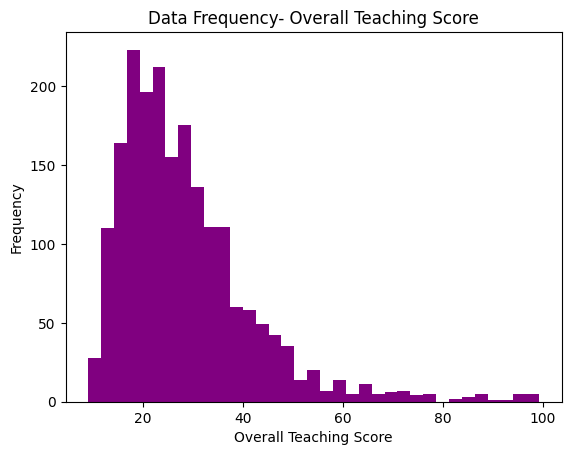

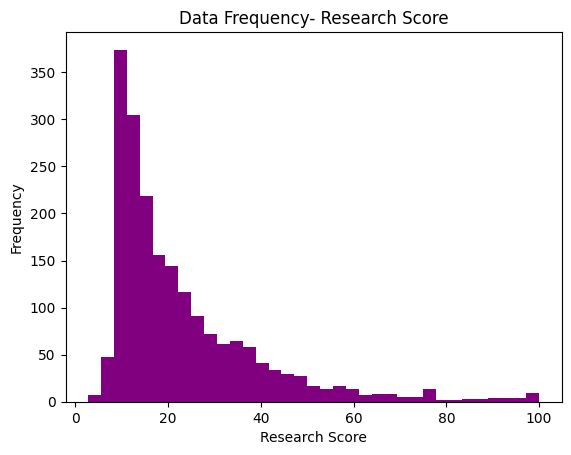

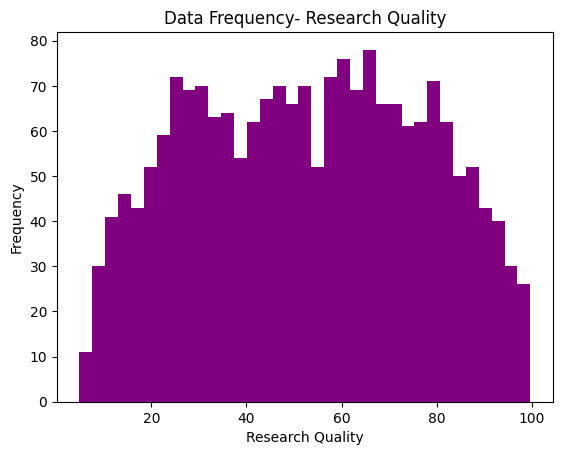

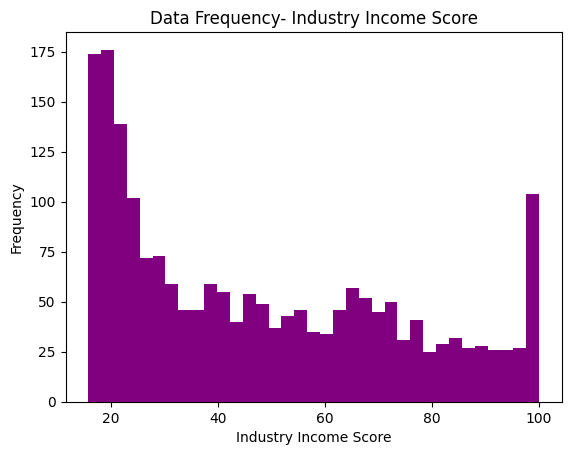

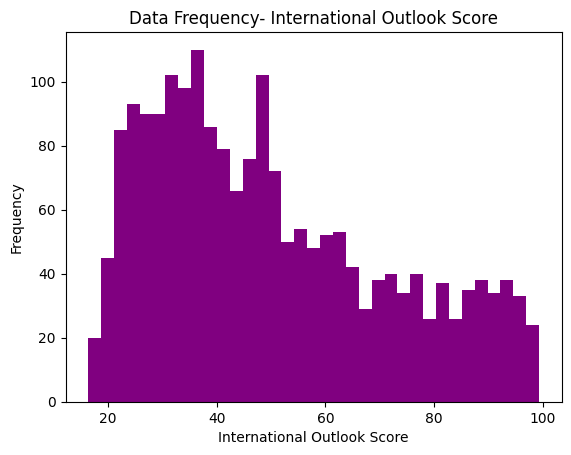

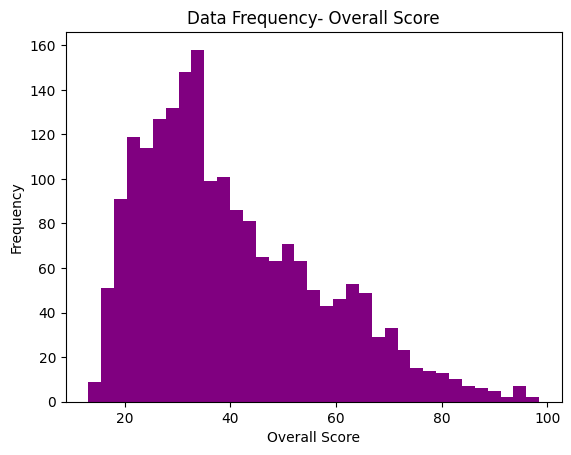

In [29]:
numeric_variable = ['Overall Teaching Score', 'Research Score','Research Quality', 'Industry Income Score','International Outlook Score', 'Overall Score']
for i in numeric_variable:
    plotHistogram(i)

<Axes: ylabel='Rank'>

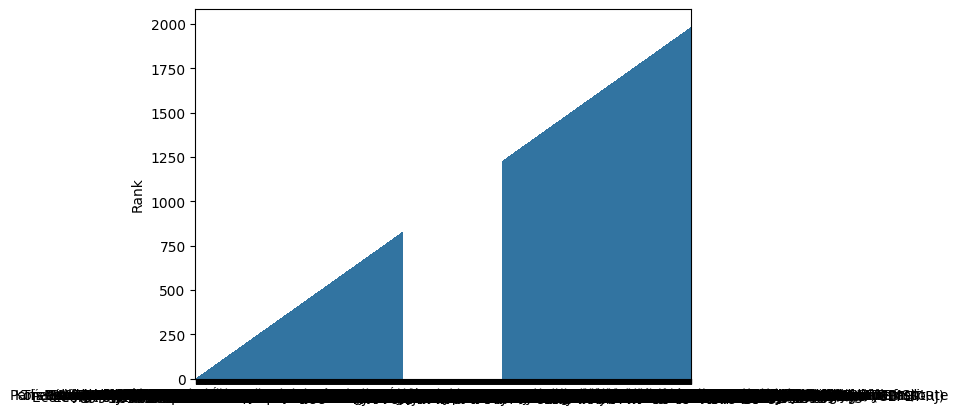

In [38]:
uni = df['University'].unique()
sns.barplot(x=uni, y=df['Rank'])